# Linear Regression

## Import libraries and data

In [1012]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt

import seaborn as sns
from seaborn import regplot

import statsmodels.formula.api as smf
import statsmodels.api as sm
import statsmodels.stats.multicomp as multi

import scipy
from scipy import stats
from scipy.stats import pearsonr

from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import minmax_scale
from sklearn.preprocessing import MaxAbsScaler
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import Normalizer
from sklearn.preprocessing import QuantileTransformer
from sklearn.preprocessing import PowerTransformer

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

import researchpy as rp

import plotly.express as px

import statistics

In [876]:
from gapminder import gapminder

In [877]:
df = gapminder

In [878]:
df = df.rename(columns={'lifeExp':'life_exp', 'pop':'population', 'gdpPercap':'gdp_per_cap'})

In [879]:
df.head()

,country,continent,year,life_exp,population,gdp_per_cap
0,Afghanistan,Asia,1952,28.801,8425333,779.445314
1,Afghanistan,Asia,1957,30.332,9240934,820.853030
2,Afghanistan,Asia,1962,31.997,10267083,853.100710
3,Afghanistan,Asia,1967,34.020,11537966,836.197138
4,Afghanistan,Asia,1972,36.088,13079460,739.981106


In [880]:
df.corr()

,year,life_exp,population,gdp_per_cap
year,1.000000,0.435611,0.082308,0.227318
life_exp,0.435611,1.000000,0.064955,0.583706
population,0.082308,0.064955,1.000000,-0.025600
gdp_per_cap,0.227318,0.583706,-0.025600,1.000000


## Implement linear regression model

In [881]:
X = df.drop(columns=['country', 'continent', 'gdp_per_cap'])

In [882]:
Y = df.gdp_per_cap

### statsmodels

#### Constant variable

In [883]:
X = sm.add_constant(X)

In [884]:
model_constant = sm.OLS(Y,X)

In [885]:
results_constant = model_constant.fit()

In [886]:
results_constant.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            gdp_per_cap   R-squared:                       0.345
Model:                            OLS   Adj. R-squared:                  0.344
Method:                 Least Squares   F-statistic:                     299.1
Date:                Thu, 30 Jun 2022   Prob (F-statistic):          6.91e-156
Time:                        18:30:13   Log-Likelihood:                -17726.
No. Observations:                1704   AIC:                         3.546e+04
Df Residuals:                    1700   BIC:                         3.548e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1.304e+04   2.43e+04      0.537      0.591   -3.46e+04    6.06e+04
year         -16.6235     12.469     -1.333      0.183     -41.079       7.832
life_exp     458.2072     16.644     27.529      0.000     425.562     490.853
population -5.776e-06   1.83e-06     -3.158      0.002   -9.36e-06   -2.19e-06
==============================================================================
Omnibus:                     1946.747   Durbin-Watson:                   0.330
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           264041.825
Skew:                           5.623   Prob(JB):                         0.00
Kurtosis:                      62.937   Cond. No.                     1.38e+10
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.38e+10. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

#### No constant variable

In [887]:
X = df.drop(columns=['country', 'continent', 'gdp_per_cap'])

In [888]:
X = X.astype(int)

In [889]:
Y = df.gdp_per_cap

In [890]:
Y = Y.astype(int)

In [891]:
model_no_constant = sm.OLS(Y,X)

In [892]:
results_no_constant = model_no_constant.fit()

In [893]:
results_no_constant.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:            gdp_per_cap   R-squared (uncentered):                   0.574
Model:                            OLS   Adj. R-squared (uncentered):              0.573
Method:                 Least Squares   F-statistic:                              762.9
Date:                Thu, 30 Jun 2022   Prob (F-statistic):                   3.23e-314
Time:                        18:30:14   Log-Likelihood:                         -17727.
No. Observations:                1704   AIC:                                  3.546e+04
Df Residuals:                    1701   BIC:                                  3.548e+04
Df Model:                           3                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
year          -9.7957      0.464    -21.110      0.000     -10.706      -8.886
life_exp     454.1035     15.246     29.785      0.000     424.201     484.006
population -5.857e-06   1.83e-06     -3.208      0.001   -9.44e-06   -2.28e-06
==============================================================================
Omnibus:                     1947.894   Durbin-Watson:                   0.329
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           265412.489
Skew:                           5.627   Prob(JB):                         0.00
Kurtosis:                      63.096   Cond. No.                     8.69e+06
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[3] The condition number is large, 8.69e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

### sklearn

In [894]:
# Initiate model
model = LinearRegression()

In [895]:
# Fit the training data
results = model.fit(X, Y)

In [896]:
results.coef_

array([-1.62573030e+01,  4.57544048e+02, -5.80000204e-06])

In [897]:
results.intercept_

12586.987458801035

In [898]:
results.get_params()

{'copy_X': True,
 'fit_intercept': True,
 'n_jobs': None,
 'normalize': False,
 'positive': False}

y_prediction =  model.predict(x_test)

#### Predicting the accuracy score
score=r2_score(y_test,y_prediction)

score
mean_squared_error(y_test,y_prediction)
np.sqrt(mean_squared_error(y_test,y_prediction))

### Visualize correlation

In [899]:
fig = px.scatter(df, x='year', y='gdp_per_cap')
fig.show()

In [900]:
fig = px.scatter(df, x='life_exp', y='gdp_per_cap')
fig.show()

In [901]:
fig = px.scatter(df, x='population', y='gdp_per_cap')
fig.show()

In [902]:
fig = px.scatter(df, x='country', y='gdp_per_cap', color='country')
fig.show()

In [903]:
europe = df.query('continent == "Europe"')

In [904]:
fig = px.scatter(europe, x='country', y='gdp_per_cap', color='year')
fig.show()

In [905]:
fig = px.scatter(europe, x='country', y='year', size='gdp_per_cap', color='population')
fig.show()

In [906]:
fig = px.scatter(europe, x='country', y='population', size='gdp_per_cap', color='year')
fig.show()

In [907]:
germany = df.query('country=="Germany"')

In [908]:
fig = px.line(germany, x='year', y='gdp_per_cap')
fig.show()

### Animated visualization

In [909]:
px.scatter(df, x="gdp_per_cap", y="life_exp")

In [910]:
px.scatter(df, x="gdp_per_cap", y="life_exp", animation_frame="year", 
           size="population", color="continent", hover_name="country",
           log_x=True, size_max=55, range_x=[100,100000], range_y=[25,90])

In [911]:
px.scatter(df, x="gdp_per_cap", y="life_exp", animation_frame="year", animation_group="country",
           size="population", color="continent", hover_name="country",
           log_x=True, size_max=55, range_x=[100,100000], range_y=[25,90])

In [912]:
px.scatter(df, x="gdp_per_cap", y="life_exp", animation_frame="year", animation_group="country",
           size="population", color="continent", hover_name="country", 
           range_x=[100,100000], range_y=[25,90])

In [913]:
px.scatter(europe, x="gdp_per_cap", y="life_exp", animation_frame="year", animation_group="country",
           size="population", color="country", 
           range_x=[100,50000], range_y=[40,90])

### Include dummy variables for continent

In [914]:
df.continent.value_counts()

Africa      624
Asia        396
Europe      360
Americas    300
Oceania      24
Name: continent, dtype: int64

In [915]:
df_dummy = df.drop(columns=['country'])

In [916]:
df_dummy = pd.get_dummies(df_dummy)

In [917]:
df_dummy.head()

,year,life_exp,population,gdp_per_cap,continent_Africa,continent_Americas,continent_Asia,continent_Europe,continent_Oceania
0,1952,28.801,8425333,779.445314,0,0,1,0,0
1,1957,30.332,9240934,820.853030,0,0,1,0,0
2,1962,31.997,10267083,853.100710,0,0,1,0,0
3,1967,34.020,11537966,836.197138,0,0,1,0,0
4,1972,36.088,13079460,739.981106,0,0,1,0,0


In [918]:
X_dummy = df_dummy.drop(columns=['gdp_per_cap'])

In [919]:
Y_dummy = df_dummy.gdp_per_cap

In [920]:
X_dummy = sm.add_constant(X_dummy)

In [921]:
model_dummy_continent = sm.OLS(Y_dummy,X_dummy)

In [922]:
results_dummy_continent = model_dummy_continent.fit()

In [923]:
results_dummy_continent.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            gdp_per_cap   R-squared:                       0.369
Model:                            OLS   Adj. R-squared:                  0.366
Method:                 Least Squares   F-statistic:                     141.4
Date:                Thu, 30 Jun 2022   Prob (F-statistic):          2.66e-164
Time:                        18:30:17   Log-Likelihood:                -17696.
No. Observations:                1704   AIC:                         3.541e+04
Df Residuals:                    1696   BIC:                         3.545e+04
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const              -2.292e+04   2.22e+04     -1.034      0.301   -6.64e+04    2.06e+04
year                   6.5271     13.939      0.468      0.640     -20.812      33.866
life_exp             388.1655     26.037     14.908      0.000     337.097     439.234
population         -6.416e-06   1.86e-06     -3.454      0.001   -1.01e-05   -2.77e-06
continent_Africa   -6707.6449   4688.123     -1.431      0.153   -1.59e+04    2487.469
continent_Americas -7802.1451   4450.063     -1.753      0.080   -1.65e+04     926.046
continent_Asia     -4915.8884   4509.084     -1.090      0.276   -1.38e+04    3928.066
continent_Europe   -3328.0795   4345.070     -0.766      0.444   -1.19e+04    5194.183
continent_Oceania   -169.5052   4494.343     -0.038      0.970   -8984.547    8645.536
==============================================================================
Omnibus:                     1996.307   Durbin-Watson:                   0.332
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           299082.688
Skew:                           5.848   Prob(JB):                         0.00
Kurtosis:                      66.841   Cond. No.                     5.55e+23
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 6.72e-29. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

### Include dummy variables for country

In [924]:
df_dummy_country = pd.get_dummies(df)

In [925]:
df_dummy_country.head()

,year,life_exp,population,gdp_per_cap,country_Afghanistan,country_Albania,country_Algeria,country_Angola,country_Argentina,country_Australia,...,country_Vietnam,country_West Bank and Gaza,"country_Yemen, Rep.",country_Zambia,country_Zimbabwe,continent_Africa,continent_Americas,continent_Asia,continent_Europe,continent_Oceania
0,1952,28.801,8425333,779.445314,1,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1,1957,30.332,9240934,820.853030,1,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,1962,31.997,10267083,853.100710,1,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,1967,34.020,11537966,836.197138,1,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
4,1972,36.088,13079460,739.981106,1,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0


In [926]:
df_dummy_country = df_dummy_country.drop(columns=['continent_Africa', 'continent_Americas', 'continent_Asia', 'continent_Europe', 'continent_Oceania'])

In [927]:
X_dummy_country = df_dummy_country.drop(columns=['gdp_per_cap'])

In [928]:
Y_dummy_country = df_dummy_country.gdp_per_cap

In [929]:
X_dummy_country = sm.add_constant(X_dummy_country)

In [930]:
model_dummy_country = sm.OLS(Y_dummy_country, X_dummy_country)

In [931]:
results_dummy_country = model_dummy_country.fit()

In [932]:
results_dummy_country.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            gdp_per_cap   R-squared:                       0.791
Model:                            OLS   Adj. R-squared:                  0.771
Method:                 Least Squares   F-statistic:                     40.89
Date:                Thu, 30 Jun 2022   Prob (F-statistic):               0.00
Time:                        18:30:18   Log-Likelihood:                -16755.
No. Observations:                1704   AIC:                         3.380e+04
Df Residuals:                    1559   BIC:                         3.459e+04
Df Model:                         144                                         
Covariance Type:            nonrobust                                         
====================================================================================================
                                       coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------
const                            -3.323e+05   2.33e+04    -14.244      0.000   -3.78e+05   -2.87e+05
year                               176.9106     12.709     13.921      0.000     151.983     201.838
life_exp                          -137.6640     33.705     -4.084      0.000    -203.775     -71.553
population                       -4.467e-06   3.87e-06     -1.153      0.249   -1.21e-05    3.13e-06
country_Afghanistan              -1.184e+04   1613.872     -7.338      0.000    -1.5e+04   -8676.881
country_Albania                  -5187.6740   1377.564     -3.766      0.000   -7889.748   -2485.600
country_Algeria                  -5234.1811   1367.973     -3.826      0.000   -7917.442   -2550.920
country_Angola                   -9020.3720   1605.771     -5.617      0.000   -1.22e+04   -5870.673
country_Argentina                  715.1326   1372.527      0.521      0.602   -1977.061    3407.326
country_Australia                 1.245e+04   1415.520      8.795      0.000    9672.588    1.52e+04
country_Austria                   1.263e+04   1404.949      8.993      0.000    9878.370    1.54e+04
country_Bahrain                   9235.5574   1368.978      6.746      0.000    6550.324    1.19e+04
country_Bangladesh               -9792.0110   1461.569     -6.700      0.000   -1.27e+04   -6925.163
country_Belgium                   1.221e+04   1408.490      8.667      0.000    9443.966     1.5e+04
country_Benin                    -9986.7370   1446.204     -6.905      0.000   -1.28e+04   -7150.027
country_Bolivia                  -7661.0354   1409.349     -5.436      0.000   -1.04e+04   -4896.617
country_Bosnia and Herzegovina   -5052.5572   1373.981     -3.677      0.000   -7747.602   -2357.512
country_Botswana                 -5323.3637   1394.334     -3.818      0.000   -8058.331   -2588.396
country_Brazil                   -2931.5157   1401.549     -2.092      0.037   -5680.635    -182.397
country_Bulgaria                 -1853.5045   1381.776     -1.341      0.180   -4563.839     856.830
country_Burkina Faso             -1.084e+04   1497.275     -7.243      0.000   -1.38e+04   -7907.966
country_Burundi                  -1.121e+04   1495.698     -7.497      0.000   -1.41e+04   -8279.349
country_Cambodia                 -1.057e+04   1455.855     -7.259      0.000   -1.34e+04   -7711.809
country_Cameroon                 -9431.2708   1453.119     -6.490      0.000   -1.23e+04   -6580.998
country_Canada                    1.496e+04   1414.391     10.574      0.000    1.22e+04    1.77e+04
country_Central African Republic -1.087e+04   1509.226     -7.200      0.000   -1.38e+04   -7905.869
country_Chad                     -1.025e+04   1469.860     -6.971      0.000   -1.31e+04   -7363.908
country_Chile                    -1839.1625   1370.16

### Improve model

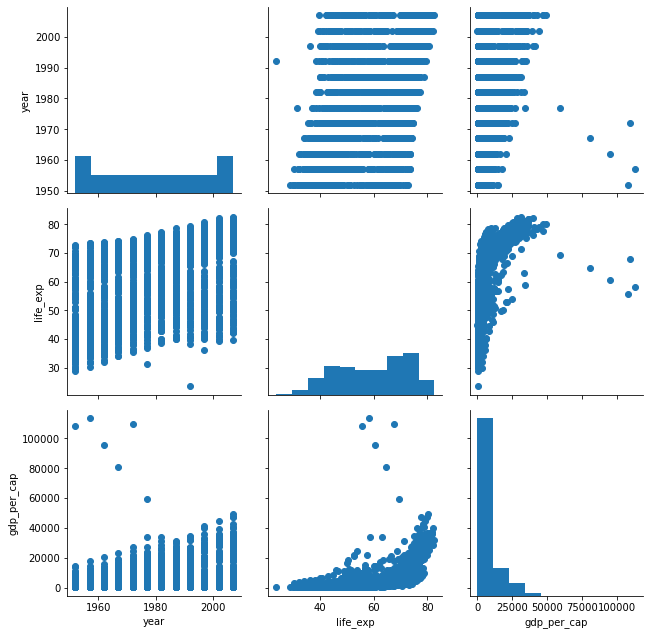

In [933]:
#Visualization of distruption and correlation 

g = sns.PairGrid(data=df, vars=['year', 'life_exp', 'gdp_per_cap'], height=3)
g.map_diag(plt.hist)
g.map_offdiag(plt.scatter);

In [934]:
X_improve = X_dummy_country.drop(columns=['population'])

In [935]:
Y_improve = Y_dummy_country

In [936]:
model = sm.OLS(Y_improve, X_improve)

In [937]:
results = model.fit()

In [938]:
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            gdp_per_cap   R-squared:                       0.790
Model:                            OLS   Adj. R-squared:                  0.771
Method:                 Least Squares   F-statistic:                     41.16
Date:                Thu, 30 Jun 2022   Prob (F-statistic):               0.00
Time:                        18:30:19   Log-Likelihood:                -16756.
No. Observations:                1704   AIC:                         3.380e+04
Df Residuals:                    1560   BIC:                         3.458e+04
Df Model:                         143                                         
Covariance Type:            nonrobust                                         
====================================================================================================
                                       coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------
const                            -3.316e+05   2.33e+04    -14.216      0.000   -3.77e+05   -2.86e+05
year                               176.6394     12.708     13.900      0.000     151.713     201.565
life_exp                          -143.7682     33.290     -4.319      0.000    -209.066     -78.470
country_Afghanistan              -1.191e+04   1612.986     -7.384      0.000   -1.51e+04   -8745.979
country_Albania                  -5006.9246   1368.765     -3.658      0.000   -7691.737   -2322.112
country_Algeria                  -5188.0814   1367.534     -3.794      0.000   -7870.479   -2505.684
country_Angola                   -9047.2243   1605.772     -5.634      0.000   -1.22e+04   -5897.525
country_Argentina                  783.4770   1371.392      0.571      0.568   -1906.489    3473.443
country_Australia                 1.261e+04   1408.432      8.956      0.000    9851.361    1.54e+04
country_Austria                   1.282e+04   1395.718      9.186      0.000    1.01e+04    1.56e+04
country_Bahrain                   9408.9041   1360.846      6.914      0.000    6739.624    1.21e+04
country_Bangladesh               -1.012e+04   1434.015     -7.056      0.000   -1.29e+04   -7305.852
country_Belgium                   1.239e+04   1399.903      8.849      0.000    9641.441    1.51e+04
country_Benin                    -9932.3719   1445.588     -6.871      0.000   -1.28e+04   -7096.871
country_Bolivia                  -7591.0497   1408.191     -5.391      0.000   -1.04e+04   -4828.904
country_Bosnia and Herzegovina   -4881.7561   1366.120     -3.573      0.000   -7561.381   -2202.131
country_Botswana                 -5219.8801   1391.591     -3.751      0.000   -7949.466   -2490.295
country_Brazil                   -3323.3908   1359.879     -2.444      0.015   -5990.773    -656.008
country_Bulgaria                 -1689.7800   1374.609     -1.229      0.219   -4386.056    1006.496
country_Burkina Faso             -1.083e+04   1497.387     -7.233      0.000   -1.38e+04   -7894.098
country_Burundi                  -1.119e+04   1495.669     -7.479      0.000   -1.41e+04   -8252.065
country_Cambodia                 -1.054e+04   1455.793     -7.239      0.000   -1.34e+04   -7682.991
country_Cameroon                 -9406.7857   1453.117     -6.474      0.000   -1.23e+04   -6556.517
country_Canada                    1.508e+04   1410.546     10.690      0.000    1.23e+04    1.78e+04
country_Central African Republic -1.084e+04   1509.148     -7.180      0.000   -1.38e+04   -7875.142
country_Chad                     -1.021e+04   1469.679     -6.948      0.000   -1.31e+04   -7328.006
country_Chile                    -1703.0578   1365.221     -1.247      0.212   -4380.920     974.804
country_China                    -7729.7222   1360.45

### Country improvement

In [939]:
# Argentina
# Bulgaria
# Chile
# Croatia
# Cuba
# Gabon
# Iraq
# Jamaica
# Korea
# Lebanon
# Mexico
# Montenegro
# Poland
# Romania
# Serbia
# Taiwan
# Trinidad and Tobago
# Uruguay
# Venezuela

In [940]:
X_improve_delete_countries = X_improve.drop(columns=['country_Argentina', 'country_Bulgaria', 'country_Chile', 'country_Croatia', 
                                      'country_Cuba', 'country_Gabon', 'country_Iraq', 'country_Jamaica', 
                                      'country_Lebanon', 'country_Mexico', 'country_Montenegro', 'country_Poland', 
                                      'country_Romania', 'country_Serbia', 'country_Taiwan', 
                                      'country_Trinidad and Tobago', 'country_Uruguay', 'country_Venezuela'])

In [941]:
model = sm.OLS(Y_improve, X_improve_delete_countries)

In [942]:
results = model.fit()

In [943]:
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            gdp_per_cap   R-squared:                       0.788
Model:                            OLS   Adj. R-squared:                  0.771
Method:                 Least Squares   F-statistic:                     46.58
Date:                Thu, 30 Jun 2022   Prob (F-statistic):               0.00
Time:                        18:30:19   Log-Likelihood:                -16765.
No. Observations:                1704   AIC:                         3.378e+04
Df Residuals:                    1577   BIC:                         3.447e+04
Df Model:                         126                                         
Covariance Type:            nonrobust                                         
====================================================================================================
                                       coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------
const                            -3.302e+05   2.15e+04    -15.343      0.000   -3.72e+05   -2.88e+05
year                               175.6472     11.679     15.039      0.000     152.739     198.556
life_exp                          -140.7236     29.531     -4.765      0.000    -198.648     -82.800
country_Afghanistan              -1.145e+04   1648.609     -6.948      0.000   -1.47e+04   -8220.310
country_Albania                  -4645.3420   1398.810     -3.321      0.001   -7389.065   -1901.619
country_Algeria                  -4797.8718   1418.164     -3.383      0.001   -7579.557   -2016.186
country_Angola                   -8592.6330   1642.309     -5.232      0.000   -1.18e+04   -5371.295
country_Australia                 1.296e+04   1416.150      9.149      0.000    1.02e+04    1.57e+04
country_Austria                   1.317e+04   1409.577      9.342      0.000    1.04e+04    1.59e+04
country_Bahrain                   9779.0944   1398.875      6.991      0.000    7035.244    1.25e+04
country_Bangladesh               -9700.4452   1487.839     -6.520      0.000   -1.26e+04   -6782.094
country_Belgium                   1.273e+04   1411.680      9.020      0.000    9964.088    1.55e+04
country_Benin                    -9510.9551   1498.766     -6.346      0.000   -1.25e+04   -6571.171
country_Bolivia                  -7180.9728   1462.761     -4.909      0.000   -1.01e+04   -4311.811
country_Bosnia and Herzegovina   -4517.9659   1398.351     -3.231      0.001   -7260.790   -1775.142
country_Botswana                 -4816.1752   1445.812     -3.331      0.001   -7652.092   -1980.259
country_Brazil                   -2942.9521   1405.435     -2.094      0.036   -5699.669    -186.235
country_Burkina Faso              -1.04e+04   1546.319     -6.724      0.000   -1.34e+04   -7364.288
country_Burundi                  -1.075e+04   1544.767     -6.960      0.000   -1.38e+04   -7722.303
country_Cambodia                 -1.011e+04   1508.288     -6.706      0.000   -1.31e+04   -7155.960
country_Cameroon                 -8983.3857   1505.800     -5.966      0.000   -1.19e+04   -6029.804
country_Canada                    1.542e+04   1417.290     10.880      0.000    1.26e+04    1.82e+04
country_Central African Republic  -1.04e+04   1556.906     -6.679      0.000   -1.35e+04   -7345.117
country_Chad                     -9783.2350   1521.106     -6.432      0.000   -1.28e+04   -6799.632
country_China                    -7347.9002   1406.856     -5.223      0.000   -1.01e+04   -4588.395
country_Colombia                 -4343.5708   1401.326     -3.100      0.002   -7092.229   -1594.913
country_Comoros                  -8845.1068   1463.831     -6.042      0.000   -1.17e+04   -5973.847
country_Congo, Dem. Rep.         -1.061e+04   1548.21

In [944]:
# no improvement

### Variable improvement

In [945]:
X_improve_variable = X_improve.drop(columns=['year', 'life_exp'])

In [946]:
model = sm.OLS(Y_improve, X_improve_variable)

In [947]:
results = model.fit()

In [948]:
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            gdp_per_cap   R-squared:                       0.736
Model:                            OLS   Adj. R-squared:                  0.712
Method:                 Least Squares   F-statistic:                     30.92
Date:                Thu, 30 Jun 2022   Prob (F-statistic):               0.00
Time:                        18:30:20   Log-Likelihood:                -16952.
No. Observations:                1704   AIC:                         3.419e+04
Df Residuals:                    1562   BIC:                         3.496e+04
Df Model:                         141                                         
Covariance Type:            nonrobust                                         
====================================================================================================
                                       coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------
const                               4.1e+15   6.45e+15      0.636      0.525   -8.55e+15    1.67e+16
country_Afghanistan                -4.1e+15   6.45e+15     -0.636      0.525   -1.67e+16    8.55e+15
country_Albania                    -4.1e+15   6.45e+15     -0.636      0.525   -1.67e+16    8.55e+15
country_Algeria                    -4.1e+15   6.45e+15     -0.636      0.525   -1.67e+16    8.55e+15
country_Angola                     -4.1e+15   6.45e+15     -0.636      0.525   -1.67e+16    8.55e+15
country_Argentina                  -4.1e+15   6.45e+15     -0.636      0.525   -1.67e+16    8.55e+15
country_Australia                  -4.1e+15   6.45e+15     -0.636      0.525   -1.67e+16    8.55e+15
country_Austria                    -4.1e+15   6.45e+15     -0.636      0.525   -1.67e+16    8.55e+15
country_Bahrain                    -4.1e+15   6.45e+15     -0.636      0.525   -1.67e+16    8.55e+15
country_Bangladesh                 -4.1e+15   6.45e+15     -0.636      0.525   -1.67e+16    8.55e+15
country_Belgium                    -4.1e+15   6.45e+15     -0.636      0.525   -1.67e+16    8.55e+15
country_Benin                      -4.1e+15   6.45e+15     -0.636      0.525   -1.67e+16    8.55e+15
country_Bolivia                    -4.1e+15   6.45e+15     -0.636      0.525   -1.67e+16    8.55e+15
country_Bosnia and Herzegovina     -4.1e+15   6.45e+15     -0.636      0.525   -1.67e+16    8.55e+15
country_Botswana                   -4.1e+15   6.45e+15     -0.636      0.525   -1.67e+16    8.55e+15
country_Brazil                     -4.1e+15   6.45e+15     -0.636      0.525   -1.67e+16    8.55e+15
country_Bulgaria                   -4.1e+15   6.45e+15     -0.636      0.525   -1.67e+16    8.55e+15
country_Burkina Faso               -4.1e+15   6.45e+15     -0.636      0.525   -1.67e+16    8.55e+15
country_Burundi                    -4.1e+15   6.45e+15     -0.636      0.525   -1.67e+16    8.55e+15
country_Cambodia                   -4.1e+15   6.45e+15     -0.636      0.525   -1.67e+16    8.55e+15
country_Cameroon                   -4.1e+15   6.45e+15     -0.636      0.525   -1.67e+16    8.55e+15
country_Canada                     -4.1e+15   6.45e+15     -0.636      0.525   -1.67e+16    8.55e+15
country_Central African Republic   -4.1e+15   6.45e+15     -0.636      0.525   -1.67e+16    8.55e+15
country_Chad                       -4.1e+15   6.45e+15     -0.636      0.525   -1.67e+16    8.55e+15
country_Chile                      -4.1e+15   6.45e+15     -0.636      0.525   -1.67e+16    8.55e+15
country_China                      -4.1e+15   6.45e+15     -0.636      0.525   -1.67e+16    8.55e+15
country_Colombia                   -4.1e+15   6.45e+15     -0.636      0.525   -1.67e+16    8.55e+15
country_Comoros                    -4.1e+15   6.45e+1

In [949]:
# much higher p value for all countries - only categorical values left

## Statistics

In [950]:
# t-test different countries

## Machine learning

In [ ]:
# https://towardsdatascience.com/all-about-feature-scaling-bcc0ad75cb35

In [952]:
x = X
y = Y

In [953]:
# Test multicollinearity

In [954]:
x.corr()
# < 0.7 / no multicollinearity (VIF)

,year,life_exp,population
year,1.000000,0.434901,0.082308
life_exp,0.434901,1.000000,0.065344
population,0.082308,0.065344,1.000000


In [955]:
# Split data set (years, random)

In [956]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 42)

In [957]:
# Sklearn

In [958]:
model = LinearRegression()

In [959]:
results = model.fit(x_train, y_train)

In [960]:
model.coef_

array([-2.24529889e+01,  4.56033647e+02, -6.15875769e-06])

In [961]:
model.intercept_

25043.833158121794

In [962]:
# OLS

In [963]:
model_OLS = sm.OLS(y_train, x_train)

In [964]:
results_OLS = model_OLS.fit()

In [965]:
results_OLS.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:            gdp_per_cap   R-squared (uncentered):                   0.550
Model:                            OLS   Adj. R-squared (uncentered):              0.549
Method:                 Least Squares   F-statistic:                              554.3
Date:                Thu, 30 Jun 2022   Prob (F-statistic):                   2.93e-235
Time:                        18:30:21   Log-Likelihood:                         -14251.
No. Observations:                1363   AIC:                                  2.851e+04
Df Residuals:                    1360   BIC:                                  2.852e+04
Df Model:                           3                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
year          -9.5973      0.541    -17.743      0.000     -10.658      -8.536
life_exp     449.1176     17.780     25.259      0.000     414.238     483.997
population -6.231e-06   2.38e-06     -2.614      0.009   -1.09e-05   -1.55e-06
==============================================================================
Omnibus:                     1601.647   Durbin-Watson:                   1.952
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           214197.582
Skew:                           5.862   Prob(JB):                         0.00
Kurtosis:                      63.284   Cond. No.                     7.78e+06
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[3] The condition number is large, 7.78e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [966]:
# Predict values

In [967]:
y_predict = model.predict(x_test)

In [968]:
# R2 score

In [969]:
score = r2_score(y_test,y_predict)
score

0.48296174211052323

In [970]:
# Mean squared error

In [971]:
mean_squared_error(y_test,y_predict)

35563943.49806845

In [972]:
np.sqrt(mean_squared_error(y_test,y_predict))

5963.551248884212

In [973]:
# Visualize results

In [974]:
prediction = pd.DataFrame(y_predict, y_test, columns=['test']).reset_index()

In [975]:
prediction = prediction.rename(columns={'gdp_per_cap':'predict'})

In [976]:
fig = px.scatter(prediction, x='test', y='predict')
fig.show()

In [977]:
# gdp should be guessed

In [978]:
# year, country, life_exp

In [979]:
# Test heteroscedacity 

In [980]:
y = y_predict - y_test

In [981]:
y = y.tolist()

In [982]:
y_mean = sum(y)/len(y)
y_std = statistics.stdev(y)

In [983]:
y_predict_mean = sum(y_predict)/len(y_predict)
y_predict_std = statistics.stdev(y_predict)

In [984]:
y_predict = y_predict.tolist() 

In [985]:
residuals = pd.DataFrame(y, y_predict, columns=['residuals']).reset_index().rename(columns={'index':'predict'})

In [986]:
residuals['predict_stand'] = (residuals.predict-y_predict_mean)/y_predict_std
residuals['residuals_stand'] = (residuals.residuals-y_mean)/y_predict_std
residuals

,predict,residuals,predict_stand,residuals_stand
0,1367.024377,979.024377,-1.107907,0.093875
1,12095.895708,6496.895708,0.846636,1.099099
2,12563.346189,5913.346189,0.931794,0.992791
3,4989.286248,2833.286248,-0.448018,0.431678
4,10583.762482,7601.762482,0.571162,1.300380
...,...,...,...,...
336,4456.581747,3265.581747,-0.545064,0.510431
337,1546.010765,852.010765,-1.075300,0.070737
338,4656.203895,2054.203895,-0.508698,0.289747
339,6068.963319,1189.963319,-0.251327,0.132303


In [987]:
fig = px.scatter(residuals, x='predict_stand', y='residuals_stand')
fig.show()
# standardized

In [1004]:
# Normalization is used when we want to bound our values between two numbers, typically, between [0,1] or [-1,1]. 
# While Standardization transforms the data to have zero mean and a variance of 1, they make our data unitless. 

In [1013]:
# Scale data
scaler_standard = StandardScaler()

In [1014]:
scaler_standard.fit(x_train)

StandardScaler()

In [1015]:
scaler_standard.mean_

array([1.97978430e+03, 5.88811445e+01, 2.77910681e+07])

In [1016]:
scaler_standard.scale_

array([1.74220533e+01, 1.30566446e+01, 9.57654474e+07])

In [1017]:
X_train_scale = scaler_standard.transform(x_train)

In [1018]:
X_train_scale.mean(axis=0)

array([-7.94994624e-16,  1.56392385e-16,  1.04261590e-17])

In [1019]:
X_train_scale.std(axis=0)

array([1., 1., 1.])

In [ ]:
# Minmax scaler

In [1020]:
scaler_minmax = MinMaxScaler()

In [1022]:
scaler_minmax.fit(x_train)

MinMaxScaler()

In [1025]:
scaler_minmax.scale_

array([1.81818182e-02, 1.69491525e-02, 7.58367579e-10])

In [1026]:
X_train_scale = scaler_minmax.transform(x_train)

In [1027]:
X_train_scale.mean(axis=0)

array([0.50516908, 0.60815499, 0.02102934])

In [1028]:
X_train_scale.std(axis=0)

array([0.31676461, 0.22129906, 0.07262541])

In [ ]:
# MaxAbs scaler

In [1029]:
scaler_maxabs = MaxAbsScaler()

In [1030]:
scaler_maxabs.fit(x_train)

MaxAbsScaler()

In [1031]:
scaler_maxabs.scale_

array([2.0070000e+03, 8.2000000e+01, 1.3186831e+09])

In [1033]:
X_train_scaled = scaler_maxabs.transform(x_train)

In [1034]:
X_train_scaled.mean(axis=0)

array([0.98643961, 0.71806274, 0.02107486])

In [1035]:
X_train_scaled.std(axis=0)

array([0.00868064, 0.15922737, 0.07262203])

In [1036]:
# Robust scaler

In [1037]:
scaler_robust = RobustScaler()

In [1038]:
scaler_robust.fit(x_train)

RobustScaler()

In [1039]:
X_train_scaled = scaler_robust.transform(x_train)

In [1040]:
X_train_scaled.mean(axis=0)

array([-0.07385669, -0.04864589,  1.26754044])

In [1041]:
X_train_scaled.std(axis=0)

array([0.58073511, 0.5676802 , 5.82720806])

In [1042]:
# Normalizer

In [1043]:
scaler_normalizer = Normalizer()

In [1044]:
scaler_normalizer.fit(x_train)

Normalizer()

In [1046]:
X_train_scaled = scaler_normalizer.transform(x_train)

In [1047]:
X_train_scaled.mean(axis=0)

array([1.03069831e-03, 2.90925503e-05, 9.99995859e-01])

In [1048]:
X_train_scaled.std(axis=0)

array([2.68550751e-03, 7.38012675e-05, 2.92165574e-05])

In [1049]:
# Quantile transformer

In [1050]:
scaler_quantile = QuantileTransformer()

In [1051]:
scaler_quantile.fit(x_train)

QuantileTransformer()

In [1053]:
X_train_scaled = scaler_quantile.transform(x_train)

In [1054]:
X_train_scaled.mean(axis=0)

array([0.50019939, 0.49998742, 0.50000265])

In [1055]:
X_train_scaled.std(axis=0)

array([0.29990627, 0.28877002, 0.28887971])

In [1056]:
# Power transformer

In [1061]:
scaler_power = PowerTransformer()

In [1062]:
scaler_power.fit(x_train)

/Users/anneruhnke/opt/anaconda3/lib/python3.8/site-packages/sklearn/preprocessing/_data.py:3237: RuntimeWarning:

divide by zero encountered in log



PowerTransformer()

In [1063]:
X_train_scaled = scaler_power.transform(x_train)

In [1064]:
X_train_scaled.mean(axis=0)

array([6.49289052e-15, 1.79851243e-16, 0.00000000e+00])

In [1065]:
X_train_scaled.std(axis=0)

array([1., 1., 0.])